#Calculating recurrence scores in time series

In [2]:
using CABLAB
using ImageMagick #Necessary for inline Map plots

We define the path to the datacube, choose some variables and read a geographical region into memory.

In [3]:
c             = Cube("/Volumes/BGI/scratch/DataCube/v1/brockmann-consult.de/datacube")
vars          = ["BHR_VIS","BurntArea","DHR_VIS","Emission","SoilMoisture","t2m"];
cdata         = getCubeData(c,latitude=(35,45), longitude=(-10,0),variable=vars);
cdata         = joinVars(cdata);

LoadError: LoadError: type SubCube has no field data
while loading In[3], in expression starting on line 4

Here starts the actual processing step. Note that each function call has the result of the previous call as its argument. The following processing steps are applied:

- gap Filling with the mean seasonal cycle
- calculating anomalies, i.e. subtract the mean seasonal cycle
- normalize the different variables to unit variance
- caculate recurrence scores to detect outliers

In [3]:
cube_filled     = gapFillMSC(cdata,46);
cube_anomalies  = removeMSC!(cube_filled,46);
cube_normalized = normalize(cube_anomalies);
scores          = recurrences!(cube_normalized,500.0,5,zeros(Float32,506,506));

Here follow some interactive time series plots of the different variables, anomalies, and the resulting scores. 3 Extreme events would be detected here. 

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"DHR_VIS",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"BurntArea",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"BHR_VIS",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

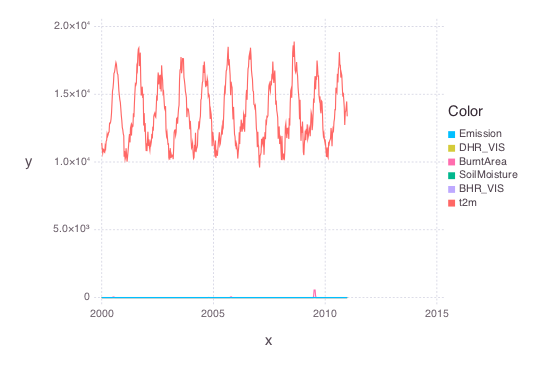

Interact.Slider{Float64}(Signal{Float64}(-5.25, nactions=1),"Longitude",-5.25,-10.0:0.25:-0.25,true)

Interact.Slider{Float64}(Signal{Float64}(39.75, nactions=1),"Latitude",39.75,35.0:0.25:44.75,true)

In [11]:
plotTS(cube_filled)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"DHR_VIS",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"BurntArea",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"BHR_VIS",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

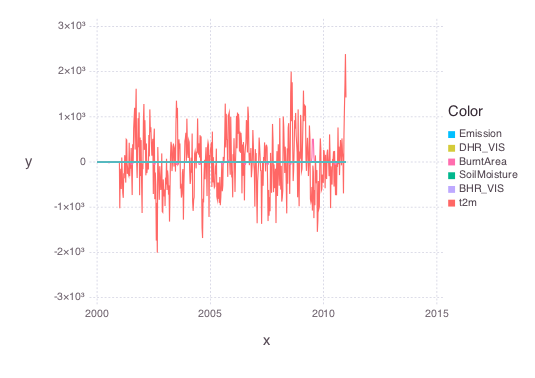

Interact.Slider{Float64}(Signal{Float64}(-5.25, nactions=1),"Longitude",-5.25,-10.0:0.25:-0.25,true)

Interact.Slider{Float64}(Signal{Float64}(39.75, nactions=1),"Latitude",39.75,35.0:0.25:44.75,true)

In [5]:
plotTS(cube_anomalies)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"DHR_VIS",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"BurntArea",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"BHR_VIS",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

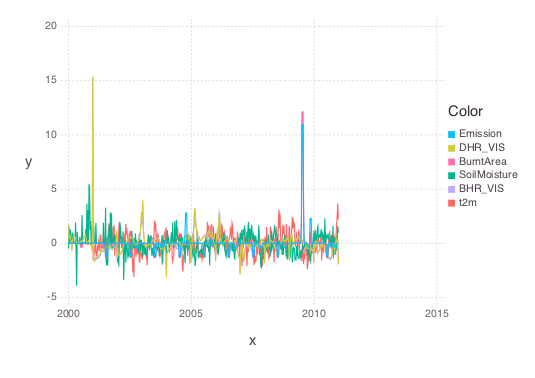

Interact.Slider{Float64}(Signal{Float64}(-5.25, nactions=1),"Longitude",-5.25,-10.0:0.25:-0.25,true)

Interact.Slider{Float64}(Signal{Float64}(39.75, nactions=1),"Latitude",39.75,35.0:0.25:44.75,true)

In [12]:
plotTS(cube_normalized)

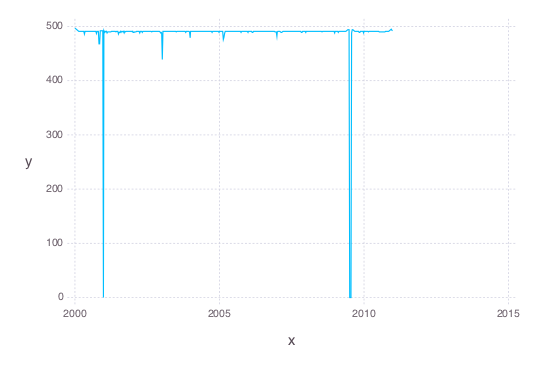

Interact.Slider{Float64}(Signal{Float64}(-5.25, nactions=1),"Longitude",-5.25,-10.0:0.25:-0.25,true)

Interact.Slider{Float64}(Signal{Float64}(39.75, nactions=1),"Latitude",39.75,35.0:0.25:44.75,true)

  likely near In[7]:2


In [7]:
scores          = recurrences!(cube_normalized,7.0,5,zeros(Float32,506,506));
plotTS(scores)

Interact.Slider{Int64}(Signal{Int64}(253, nactions=0),"Time Step",253,1:506,true)

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"",1,"Emission",Interact.OptionDict(Any["Emission","DHR_VIS","BurntArea","SoilMoisture","BHR_VIS","t2m"],Dict{Any,Any}("Emission"=>1,"DHR_VIS"=>2,"BurntArea"=>3,"SoilMoisture"=>4,"BHR_VIS"=>5,"t2m"=>6)),Any[],Any[])

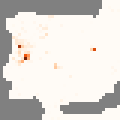

  likely near In[8]:1
  likely near In[8]:1


In [8]:
plotMAP(cdata)

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"x",5,1:10,true)

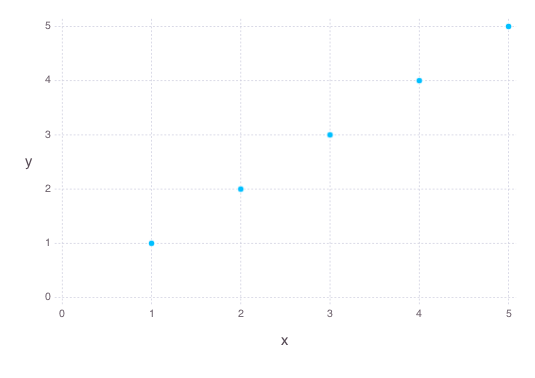

In [9]:
using Gadfly
using Interact
@manipulate for x=1:10
    plot(x=1:x,y=1:x)
end